In [4]:
import pandas as pd

wine = pd.read_csv("/home/aa/Big2025/ml_dl_python/data/wine_csv_data.csv")

In [5]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [11]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [12]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)

In [13]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
print(lr.predict(test_scaled[:5]))
print(test_target[:5].flatten())

0.7808350971714451
0.7776923076923077
[1. 1. 1. 1. 1.]
[1. 0. 1. 1. 1.]


In [16]:
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


In [21]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
print(dt.predict(test_scaled[:5]))
print(test_target[:5].flatten())

0.996921300750433
0.8592307692307692
[1. 0. 1. 1. 1.]
[1. 0. 1. 1. 1.]


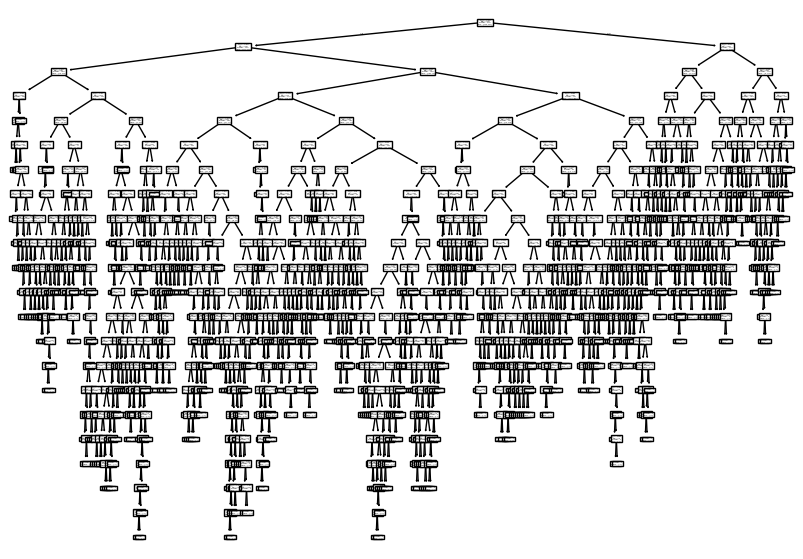

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

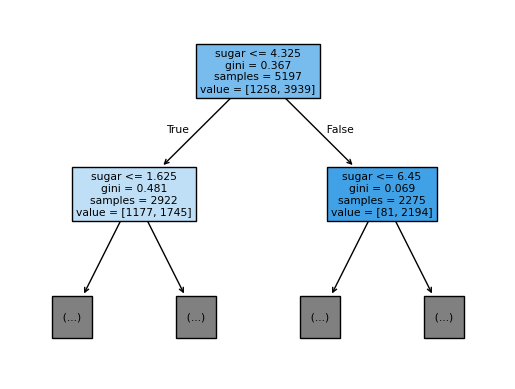

In [42]:
# plt.figure(figsize = (20, 15))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [25]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
print(dt.predict(test_scaled[:5]))
print(test_target[:5].flatten())

0.8454877814123533
0.8415384615384616
[1. 0. 1. 1. 1.]
[1. 0. 1. 1. 1.]


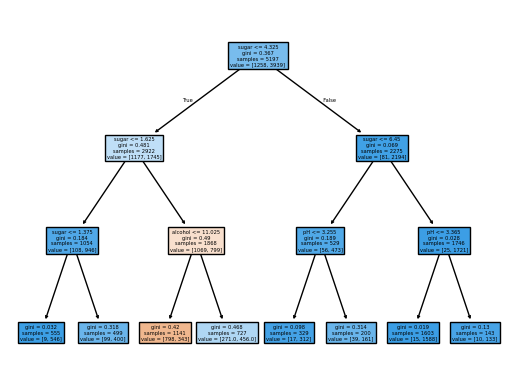

In [43]:
# plt.figure(figsize = (20, 15))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [28]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_input, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
print(dt.predict(test_scaled[:5]))
print(test_target[:5].flatten())

0.6663459688281701
0.6561538461538462
[1. 1. 1. 1. 0.]
[1. 0. 1. 1. 1.]


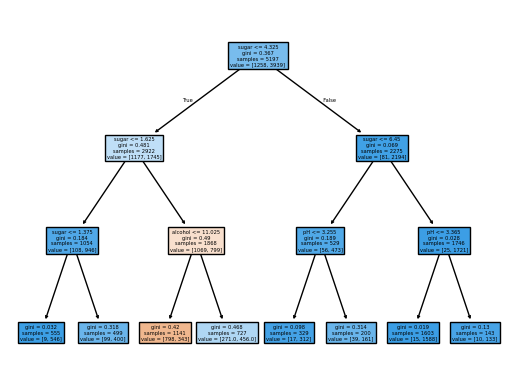

In [32]:
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [30]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
